The given dataset contains the price of a second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year
and price. Can you predict the possible price of a 2022 model second-hand
grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Desktop\Meenakshi\DSA\Assignments\Assignment 5\car_age_price.csv")

In [3]:
data.head(10)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
9,2017,575000


In [4]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [5]:
x = data[['Year']]
y = data['Price']

In [6]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [7]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression,Lasso
lr=LinearRegression()
la=Lasso(alpha=0.1)

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
la.fit(x_train,y_train)

Lasso(alpha=0.1)

In [12]:
y_pred_linear = lr.predict(x_test)
y_pred_lasso = la.predict(x_test)


Evaluating both models

In [13]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error of LinearRegression model = ",mean_squared_error(y_test,y_pred_linear))
print("R Squared Value of LinearRegression model= ",r2_score(y_test,y_pred_linear))


Mean Squared Error of LinearRegression model =  4326906256.829671
R Squared Value of LinearRegression model=  0.36759313425902185


In [14]:
print("Mean Squared Error of LassoRegression model= ",mean_squared_error(y_test,y_pred_lasso))
print("R Squared Value of LassoRegression model= ",r2_score(y_test,y_pred_lasso))


Mean Squared Error of LassoRegression model=  4326901608.19506
R Squared Value of LassoRegression model=  0.36759381368868127


Predict the price of a 2022 model

In [15]:
year_2022 = np.array([[2022]])
predicted_price_linear = lr.predict(year_2022)
predicted_price_lasso = la.predict(year_2022)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [16]:
print("Predicted price using LinearRegression on 2022 model = ",predicted_price_linear )
print("Predicted price using LassoRegression on 2022 model = ",predicted_price_lasso )

Predicted price using LinearRegression on 2022 model =  [743601.61594504]
Predicted price using LassoRegression on 2022 model =  [743601.39177768]


Comparing the performance

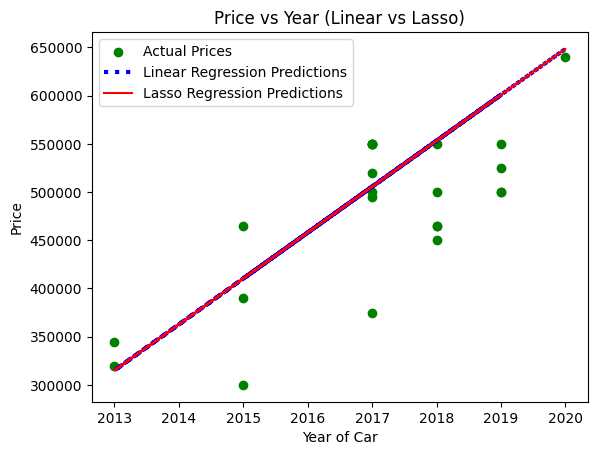

In [17]:
plt.scatter(x_test, y_test, color='green', label='Actual Prices')
plt.plot(x_test, y_pred_linear, color='blue', label='Linear Regression Predictions',linestyle=':', linewidth=3)
plt.plot(x_test, y_pred_lasso, color='red', label='Lasso Regression Predictions')
plt.xlabel('Year of Car')
plt.ylabel('Price')
plt.title('Price vs Year (Linear vs Lasso)')
plt.legend()
plt.show()